<a href="https://colab.research.google.com/github/cjvilla/Gold-Projections/blob/main/Code/random_forest_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
data = pd.read_csv('/content/drive/MyDrive/Gold-Projections/celine-work/datetime_gold_predictions.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [66]:
data.info

<bound method DataFrame.info of         Date  Inflation_Value  ...  south_african_rand  australian_dollar
0    01/1979              9.3  ...          197.018182         198.600000
1    02/1979              9.9  ...          209.860000         216.650000
2    03/1979             10.1  ...          204.359091         215.945455
3    04/1979             10.5  ...          202.347619         215.414286
4    05/1979             10.9  ...          217.695652         233.165217
..       ...              ...  ...                 ...                ...
487  08/2019              1.7  ...        22746.936360        2212.959091
488  09/2019              1.7  ...        22424.838100        2219.166667
489  10/2019              1.8  ...        22288.847830        2199.952174
490  11/2019              2.1  ...        21740.861900        2153.471429
491  12/2019              2.3  ...        21280.122730        2146.600000

[492 rows x 8 columns]>

Text(0.5, 1.12, 'Feature Correlation')

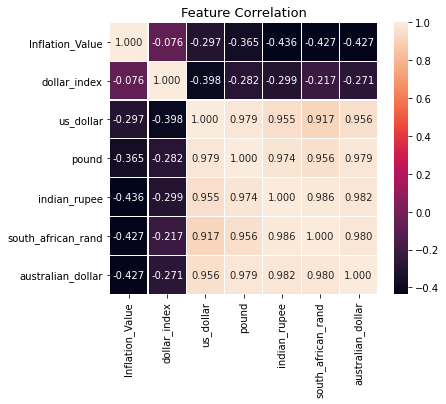

In [67]:
corr = data.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,fmt='.3f',linewidths=0.2)
plt.title('Feature Correlation', y = 1.12, size=13, loc="center")

In [116]:
from sklearn.model_selection import train_test_split
temp = data[['Inflation_Value', 'dollar_index']]
y_temp = data[['us_dollar']]
x = temp.iloc[:,:].values
y= data.loc[:,['us_dollar']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [117]:
y_pred = regressor.predict(x_test)
y_pred

array([1129.50994093,  947.59576581,  441.03854227,  490.3151361 ,
        554.81816779, 1124.98095967,  516.70965058, 1106.76647066,
        625.21525702, 1043.09493389, 1460.38883194,  931.85070872,
        364.62204549,  487.1905809 ,  386.80118974, 1294.54342084,
        351.82677909,  392.6896723 , 1144.0022638 ,  484.85409841,
        564.3437098 ,  569.29926047,  378.09413828, 1153.81922267,
       1380.77771615,  385.79602483,  434.10947497, 1148.30701708,
        307.71035512,  537.98444503, 1337.37018618,  432.06251476,
       1189.90704409,  361.51062921,  394.505802  ,  950.40030849,
        721.84549768,  591.34875115,  694.77334867,  444.02299849,
        409.12477763,  375.56019391, 1109.62822832,  983.87297404,
        433.85743202, 1422.88417776, 1099.78864941,  451.67081166,
       1071.46388007,  382.16698214,  588.88851298, 1586.64216948,
        907.18278758,  457.56749706,  367.94965827, 1075.43584728,
       1154.8272829 ,  422.23570446, 1285.69842968,  441.92404

In [118]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print("Training Accuracy: ", accuracy_train)
print("Testing Accuracy: ", accuracy_test)

Training Accuracy:  0.9320953840729527
Testing Accuracy:  0.632462994726317


In [119]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   169.95119491082835
MSE :   75949.27893768856
RMAE :   275.5889673729494


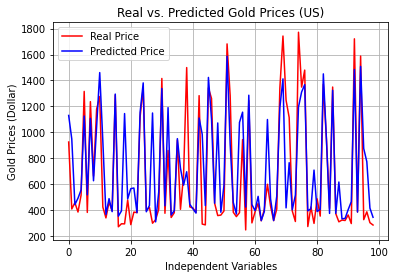

In [120]:
#Visualising the Accuracy of Predicted result
plt.plot(y_test, color = 'Red', label = 'Real Price')
plt.plot(y_pred, color = 'Blue', label = 'Predicted Price')
plt.grid(2.5)
plt.title('Real vs. Predicted Gold Prices (US)')
plt.xlabel('Independent Variables')
plt.ylabel('Gold Prices (Dollar)')
plt.legend()
plt.show()

In [121]:
data.columns

Index(['Date', 'Inflation_Value', 'dollar_index', 'us_dollar', 'pound',
       'indian_rupee', 'south_african_rand', 'australian_dollar'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Training Accuracy:  0.9237461711025151
Testing Accuracy:  0.49740372970726665
MAE :   127.18459341949497
MSE :   51266.196699923974
RMAE :   226.42039815335536


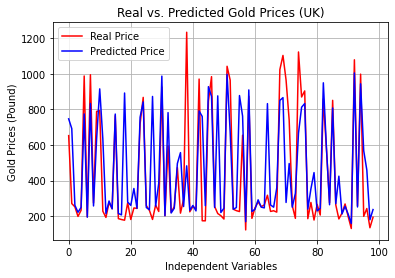

In [122]:
from sklearn.model_selection import train_test_split
temp = data[['Inflation_Value', 'dollar_index']]
y_temp = data[['us_dollar']]
x = temp.iloc[:,:].values
y= data.loc[:,['pound']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print("Training Accuracy: ", accuracy_train)
print("Testing Accuracy: ", accuracy_test)

from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

plt.plot(y_test, color = 'Red', label = 'Real Price')
plt.plot(y_pred, color = 'Blue', label = 'Predicted Price')
plt.grid(2.5)
plt.title('Real vs. Predicted Gold Prices (UK)')
plt.xlabel('Independent Variables')
plt.ylabel('Gold Prices (Pound)')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Training Accuracy:  0.9335263775362642
Testing Accuracy:  0.5258535429334885
MAE :   12533.122076777678
MSE :   471172942.9604527
RMAE :   21706.518444017056


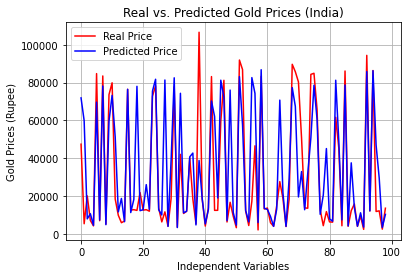

In [125]:
from sklearn.model_selection import train_test_split
temp = data[['Inflation_Value', 'dollar_index']]
y_temp = data[['us_dollar']]
x = temp.iloc[:,:].values
y= data.loc[:,['indian_rupee']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print("Training Accuracy: ", accuracy_train)
print("Testing Accuracy: ", accuracy_test)

from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

plt.plot(y_test, color = 'Red', label = 'Real Price')
plt.plot(y_pred, color = 'Blue', label = 'Predicted Price')
plt.grid(2.5)
plt.title('Real vs. Predicted Gold Prices (India)')
plt.xlabel('Independent Variables')
plt.ylabel('Gold Prices (Rupee)')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Training Accuracy:  0.9278342530554825
Testing Accuracy:  0.415135727900244
MAE :   2494.584850507213
MSE :   21281216.45806941
RMAE :   4613.156886349023


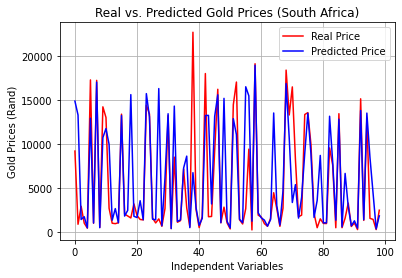

In [127]:
from sklearn.model_selection import train_test_split
temp = data[['Inflation_Value', 'dollar_index']]
y_temp = data[['us_dollar']]
x = temp.iloc[:,:].values
y= data.loc[:,['south_african_rand']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print("Training Accuracy: ", accuracy_train)
print("Testing Accuracy: ", accuracy_test)

from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

plt.plot(y_test, color = 'Red', label = 'Real Price')
plt.plot(y_pred, color = 'Blue', label = 'Predicted Price')
plt.grid(2.5)
plt.title('Real vs. Predicted Gold Prices (South Africa)')
plt.xlabel('Independent Variables')
plt.ylabel('Gold Prices (Rand)')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Training Accuracy:  0.9253690703238016
Testing Accuracy:  0.46404882246474355
MAE :   199.0078865385556
MSE :   131121.12353799373
RMAE :   362.10650855514007


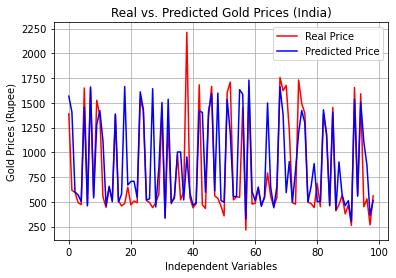

In [130]:
from sklearn.model_selection import train_test_split
temp = data[['Inflation_Value', 'dollar_index']]
y_temp = data[['us_dollar']]
x = temp.iloc[:,:].values
y= data.loc[:,['australian_dollar']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print("Training Accuracy: ", accuracy_train)
print("Testing Accuracy: ", accuracy_test)

from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

plt.plot(y_test, color = 'Red', label = 'Real Price')
plt.plot(y_pred, color = 'Blue', label = 'Predicted Price')
plt.grid(2.5)
plt.title('Real vs. Predicted Gold Prices (India)')
plt.xlabel('Independent Variables')
plt.ylabel('Gold Prices (Rupee)')
plt.legend()
plt.show()